# **Samsung**

In [90]:
import pandas as pd 
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller


from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [64]:
url='Samsung Dataset.csv'
df=pd.read_csv(url,sep=',')
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000


## **EDA**

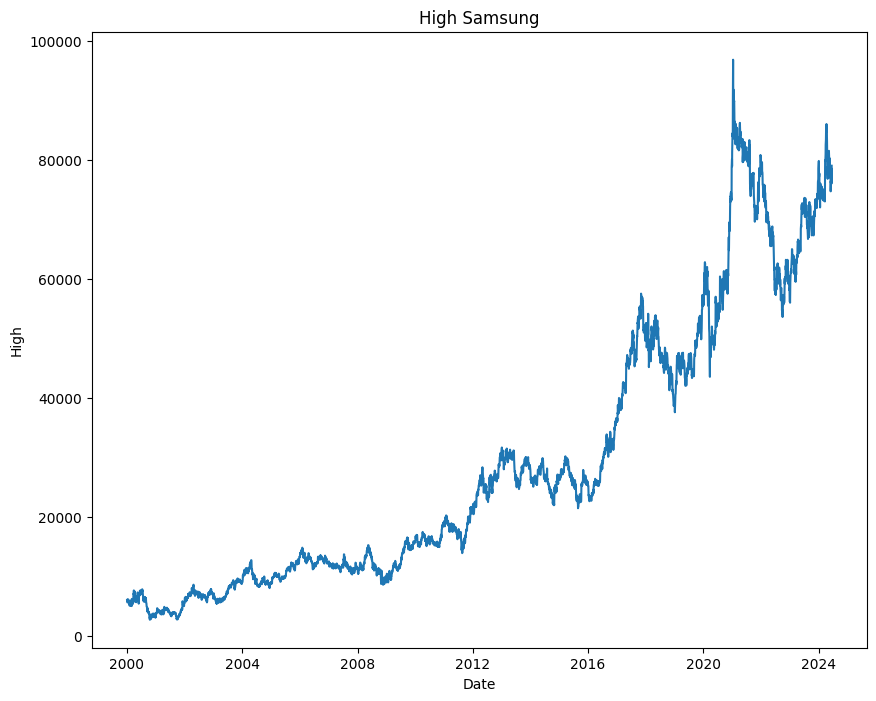

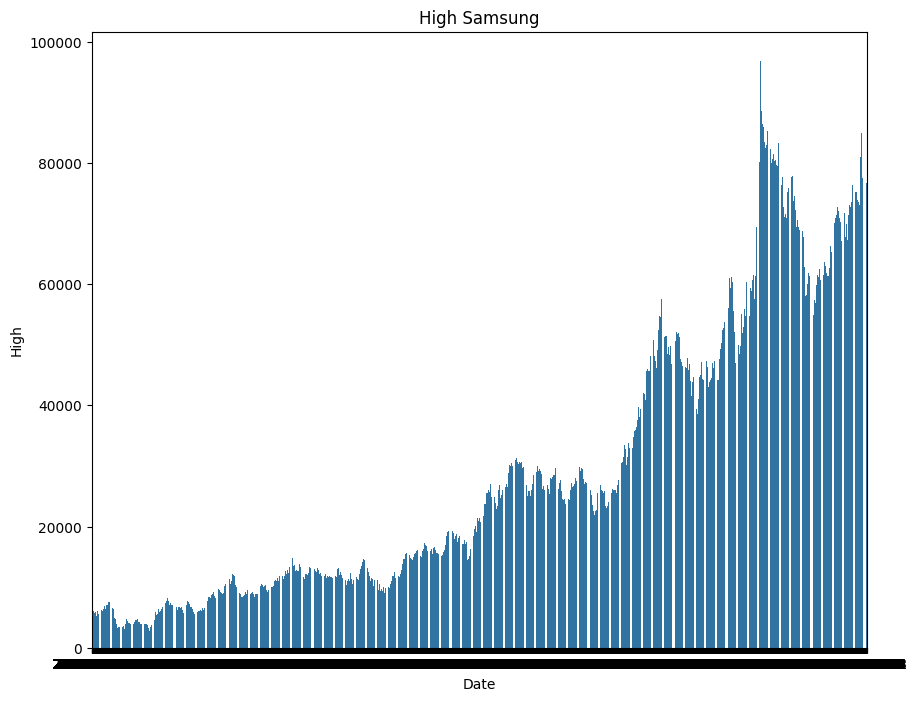

In [7]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df,x='Date',y='High')
plt.title('High Samsung')
plt.show()
plt.figure(figsize=(10,8))
sns.barplot(data=df,x='Date',y='High')
plt.title('High Samsung')
plt.show()

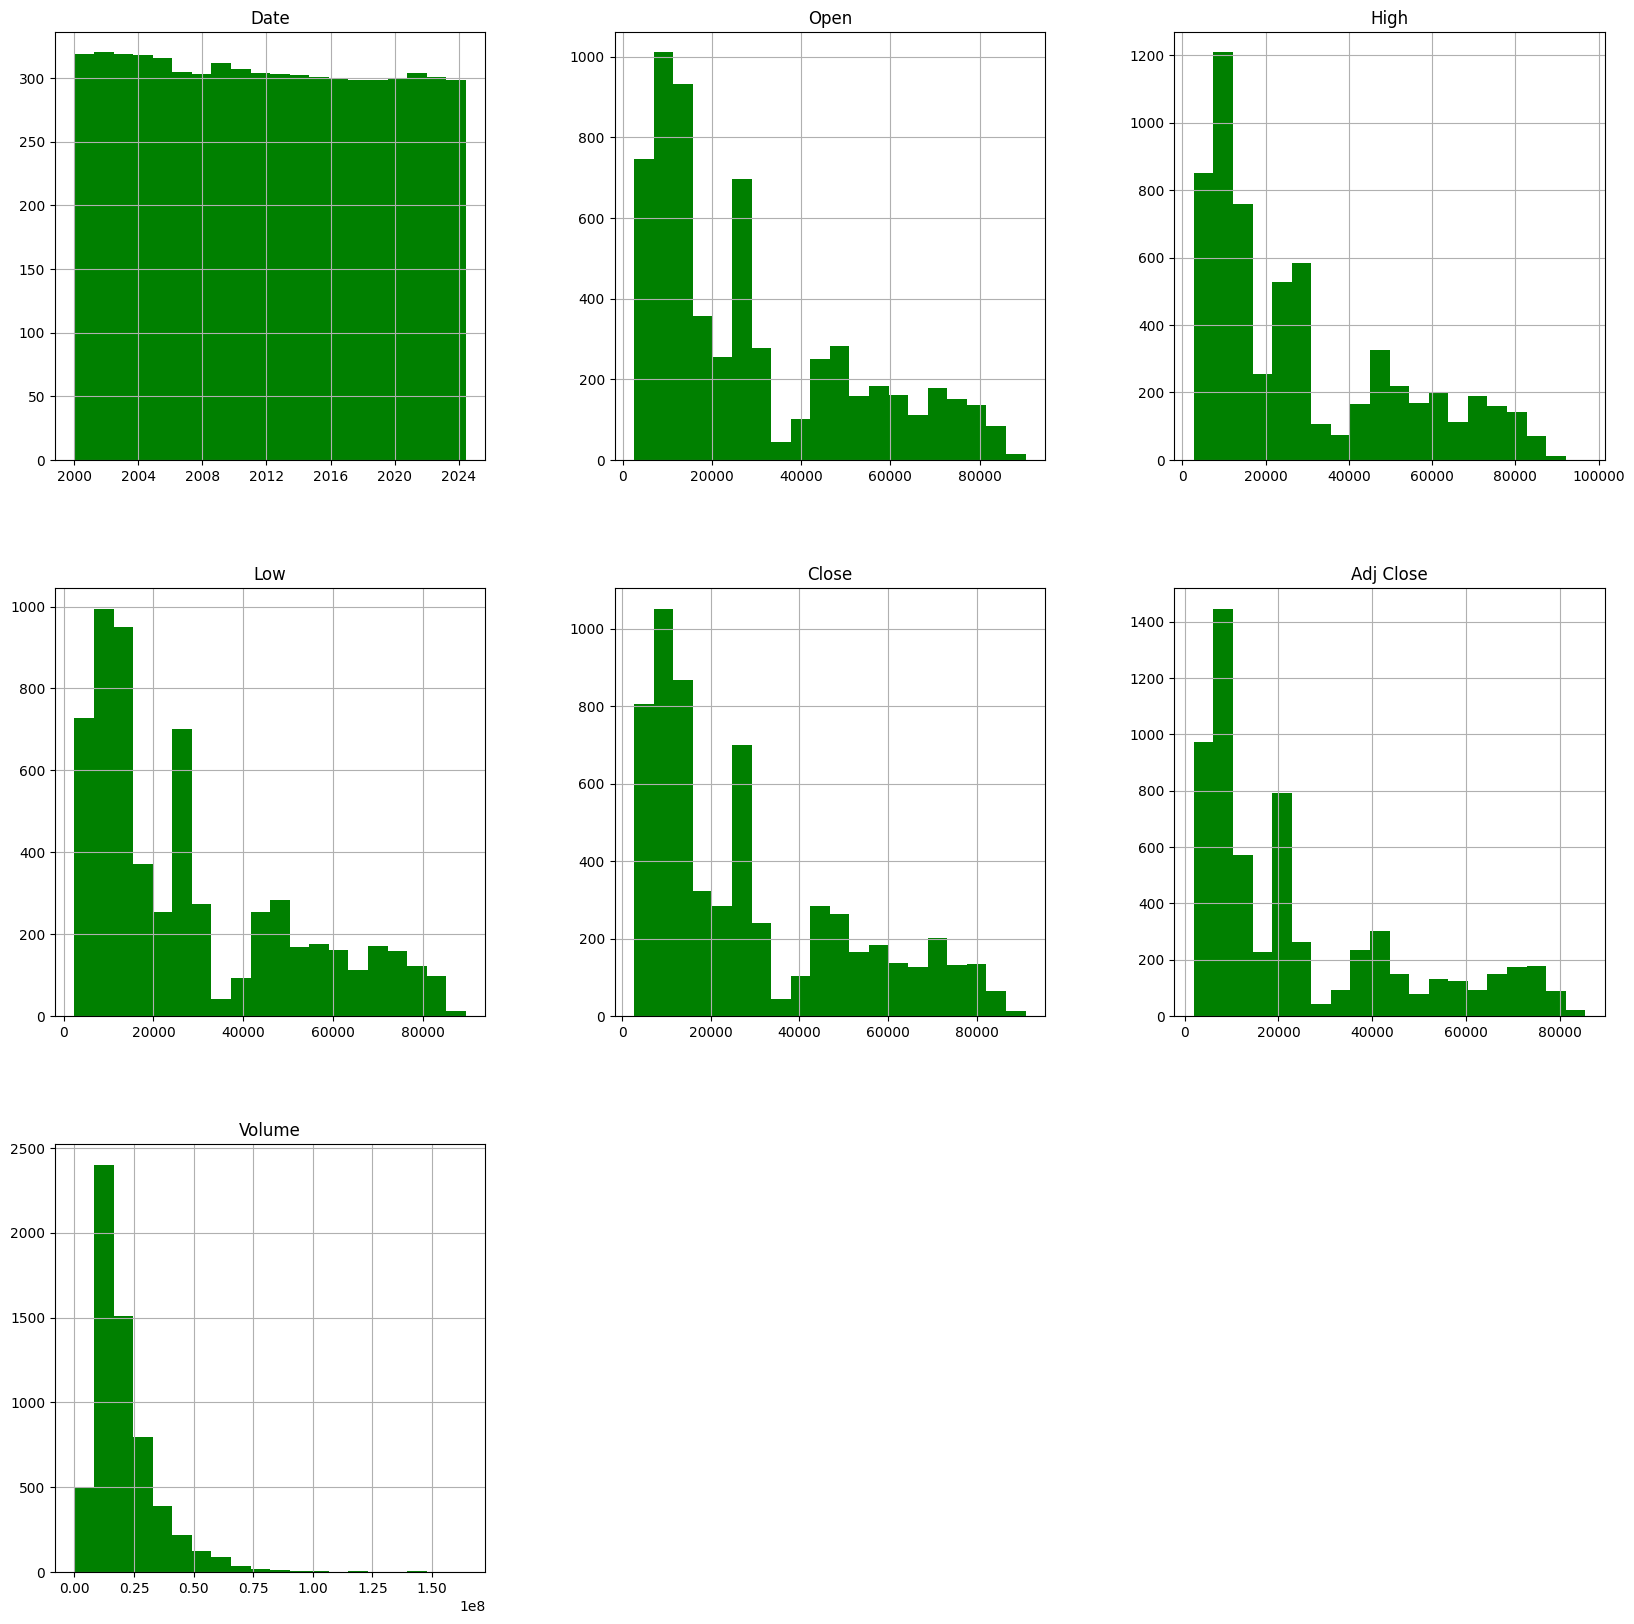

In [8]:
df.hist(bins = 20, figsize = (20,20), color = 'g')
plt.show()

In [65]:
df['Año']=df['Date'].dt.year
df['Mes']=df['Date'].dt.month
df['Día de la Semana'] = df['Date'].dt.day_name()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Año,Mes,Día de la Semana
0,2000-01-04,6000.0,6110.0,5660.0,6110.0,4449.709961,74195000,2000,1,Tuesday
1,2000-01-05,5800.0,6060.0,5520.0,5580.0,4063.728760,74680000,2000,1,Wednesday
2,2000-01-06,5750.0,5780.0,5580.0,5620.0,4092.859863,54390000,2000,1,Thursday
3,2000-01-07,5560.0,5670.0,5360.0,5540.0,4034.598877,40305000,2000,1,Friday
4,2000-01-10,5600.0,5770.0,5580.0,5770.0,4202.098145,46880000,2000,1,Monday


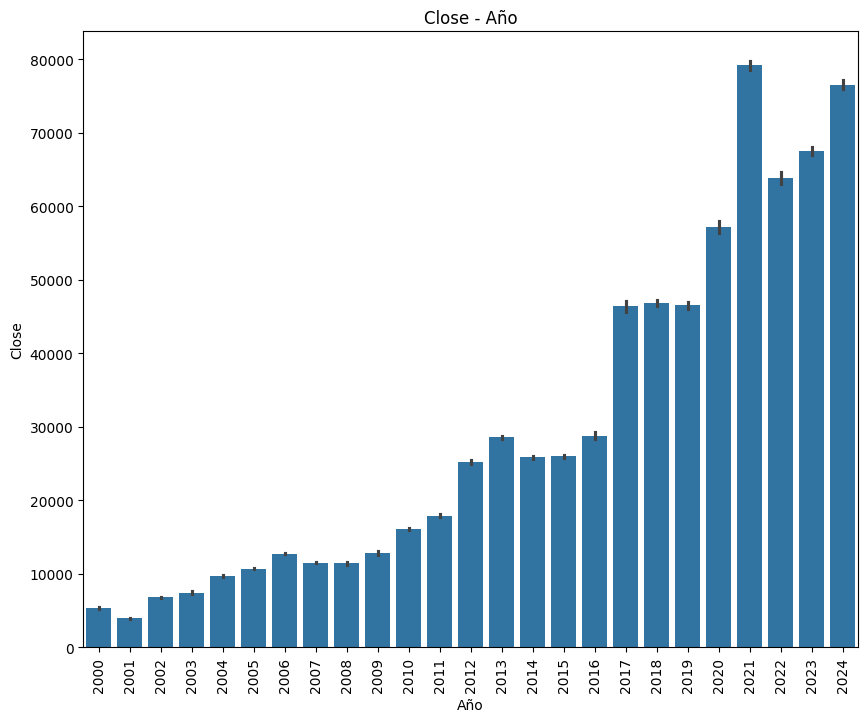

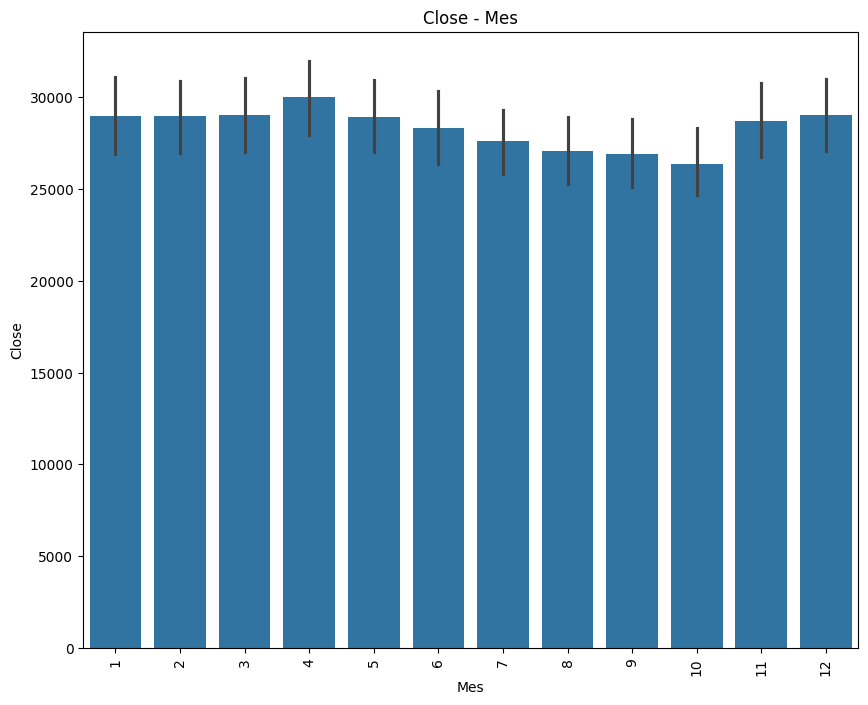

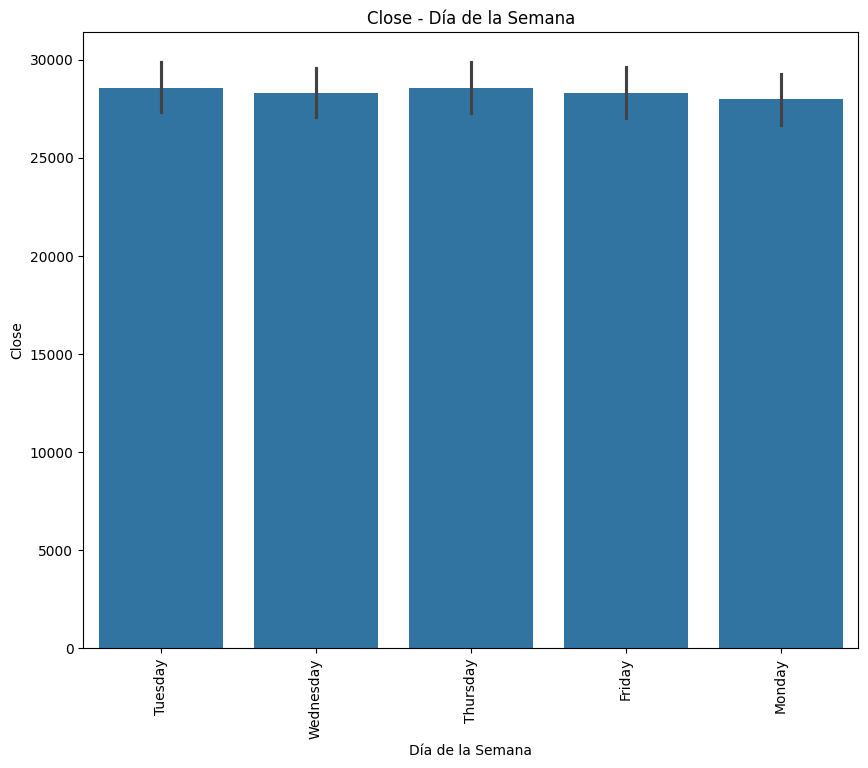

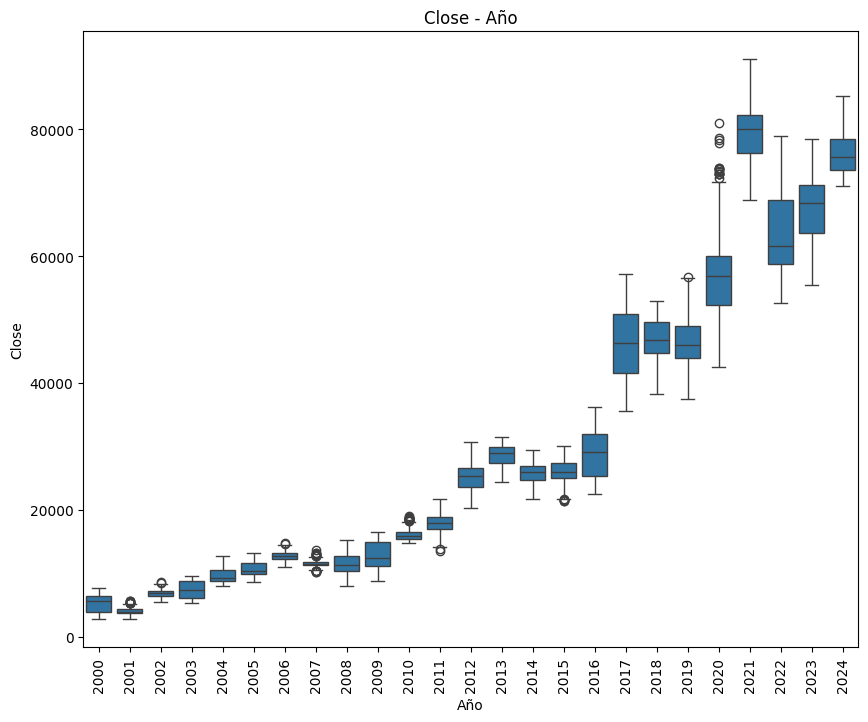

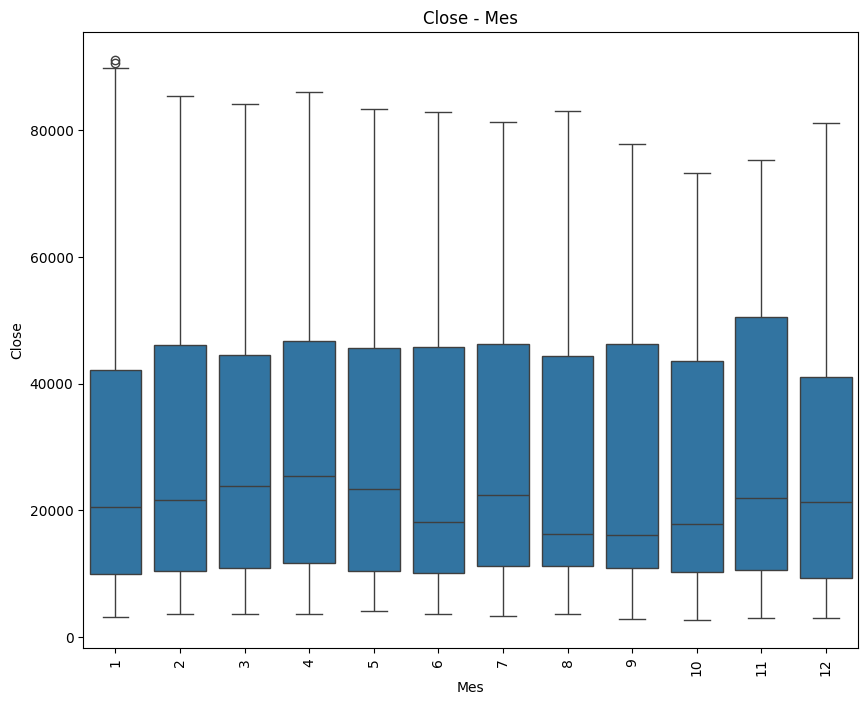

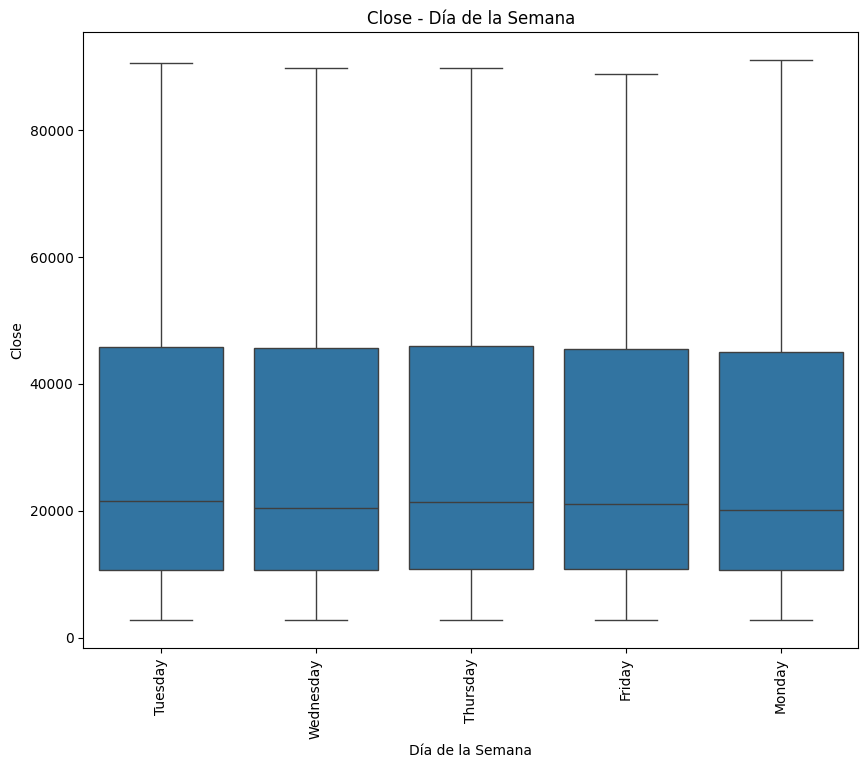

In [61]:
col_1=['Año','Mes','Día de la Semana']
for i in col_1:
    plt.figure(figsize=(10,8))
    sns.barplot(data=df,x=i,y='Close')
    plt.title(f'Close - {i}')
    plt.xticks(rotation='vertical')
    plt.show()
    
for i in col_1:
    plt.figure(figsize=(10,8))
    sns.boxplot(data=df,x=i,y='Close')
    plt.title(f'Close - {i}')
    plt.xticks(rotation='vertical')
    plt.show()

# **Estacionario o No estacionario**

In [66]:
df.set_index('Date',inplace=True) # Establecer el date como indice
monthly_avg = df[['Close']].resample('M').mean()
monthly_avg

,Close
Date,
2000-01-31,5763.500000
2000-02-29,5241.904762
2000-03-31,5999.565217
2000-04-30,6356.500000
2000-05-31,6286.521739
...,...
2024-02-29,73694.736842
2024-03-31,75760.000000
2024-04-30,80595.238095


In [67]:
monthly_avg['Close_diff']=monthly_avg['Close'].diff()
monthly_avg.dropna(inplace=True)
monthly_avg.head()

,Close,Close_diff
Date,,
2000-02-29,5241.904762,-521.595238
2000-03-31,5999.565217,757.660455
2000-04-30,6356.500000,356.934783
2000-05-31,6286.521739,-69.978261
2000-06-30,7011.363636,724.841897


In [68]:
def Prueba_Dickey_Fuller(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")
     

In [69]:
Prueba_Dickey_Fuller(monthly_avg['Close'],'Close')

Resultados de la prueba de Dickey-Fuller para columna: Close
Test Statistic                         -0.014473
p-value                                 0.957319
No Lags Used                           13.000000
Número de observaciones utilizadas    279.000000
Critical Value (1%)                    -3.454008
Critical Value (5%)                    -2.871956
Critical Value (10%)                   -2.572320
dtype: float64
Conclusion:====>
No se puede rechazar la hipótesis nula
Los datos no son estacionarios


In [70]:
Prueba_Dickey_Fuller(monthly_avg['Close_diff'],'Close_diff')

Resultados de la prueba de Dickey-Fuller para columna: Close_diff
Test Statistic                         -4.875417
p-value                                 0.000039
No Lags Used                           12.000000
Número de observaciones utilizadas    280.000000
Critical Value (1%)                    -3.453922
Critical Value (5%)                    -2.871918
Critical Value (10%)                   -2.572300
dtype: float64
Conclusion:====>
Rechazar la hipótesis nula
Los datos son estacionarios


In [72]:
monthly_avg.shape[0]*0.20

58.6

In [89]:
f = Forecaster(
    y=monthly_avg['Close_diff'],
    current_dates=monthly_avg.index,
    future_dates = 12,
    test_length = .2,
    cis = True,
)
f

Forecaster(
    DateStartActuals=2000-02-29T00:00:00.000000000
    DateEndActuals=2024-06-30T00:00:00.000000000
    Freq=M
    N_actuals=293
    ForecastLength=12
    Xvars=[]
    TestLength=58
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    CurrentEstimator=mlr
    GridsFile=Grids
)

Text(0.5, 1.0, 'Original Sunspots Series')

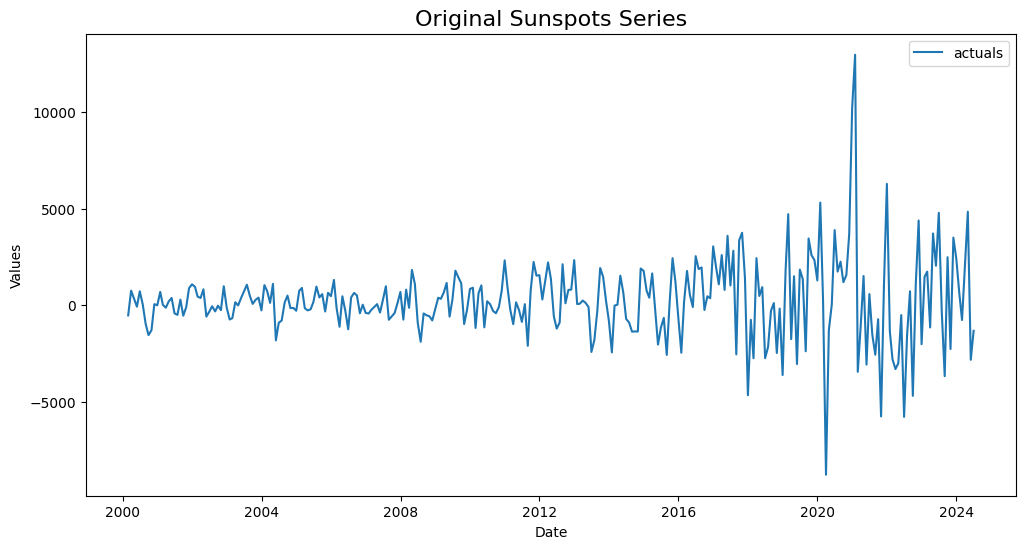

In [91]:
f.plot()
plt.title('Original Sunspots Series',size=16)

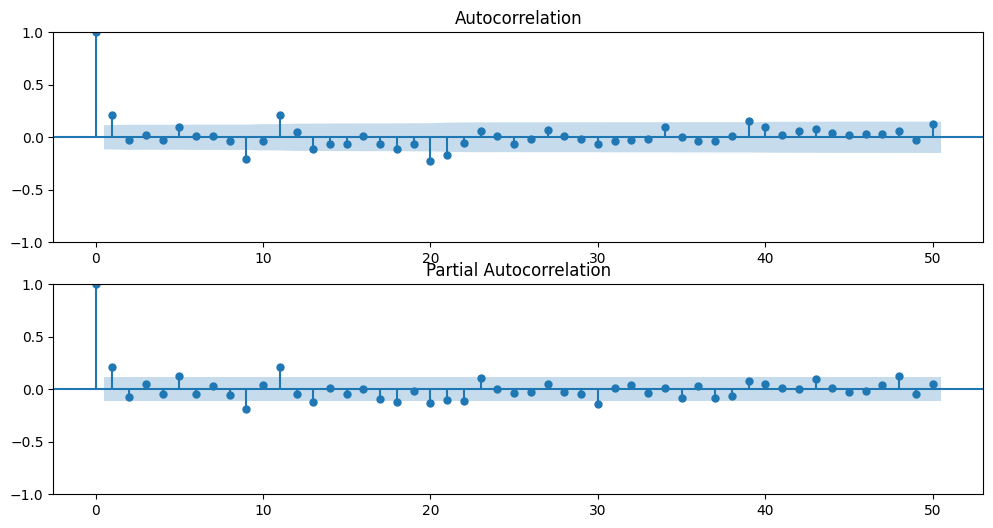

In [92]:
figs, axs = plt.subplots(2, 1, figsize = (12,6))
f.plot_acf(ax=axs[0],lags=50)
f.plot_pacf(ax=axs[1],lags=50,method='ywm')
plt.show()

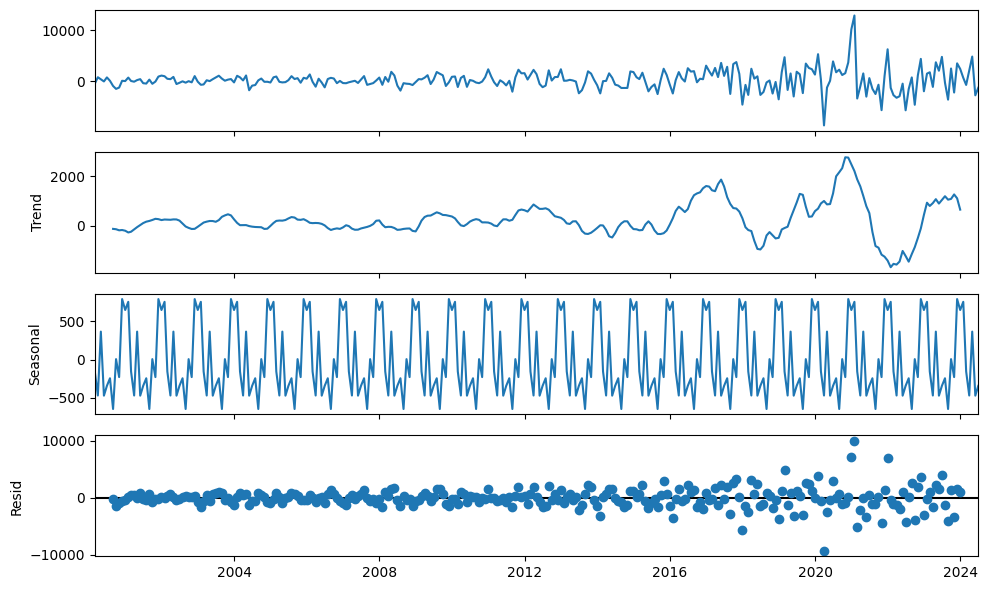

In [93]:
plt.rc("figure",figsize=(10,6))
f.seasonal_decompose().plot()
plt.show()

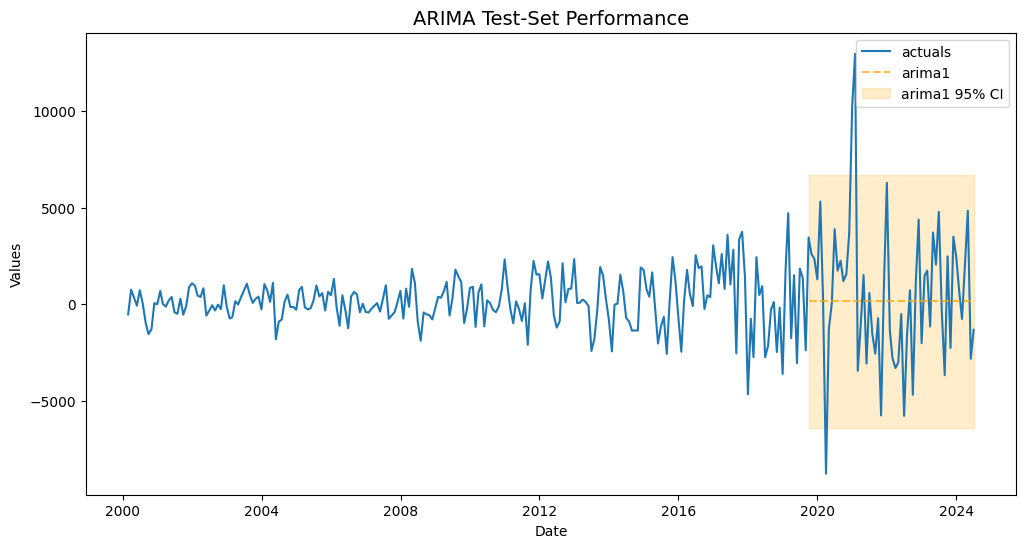

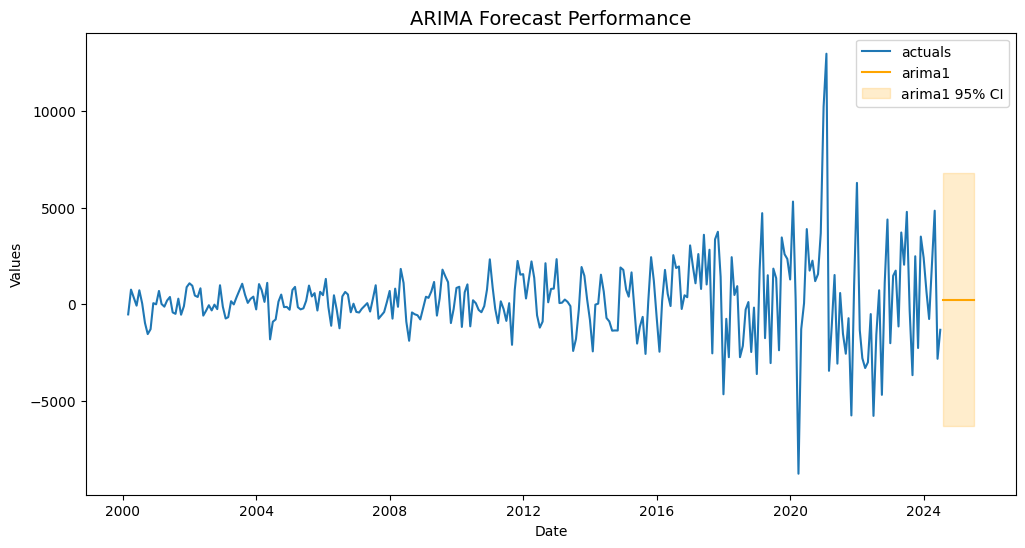

In [96]:
f.set_estimator('arima')
f.manual_forecast(call_me='arima1')

f.plot_test_set(ci=True)
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

f.plot(ci=True)
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [102]:
f.manual_forecast(order=(2,1,2),seasonal_order=(2,2,1,12),call_me='arima2')

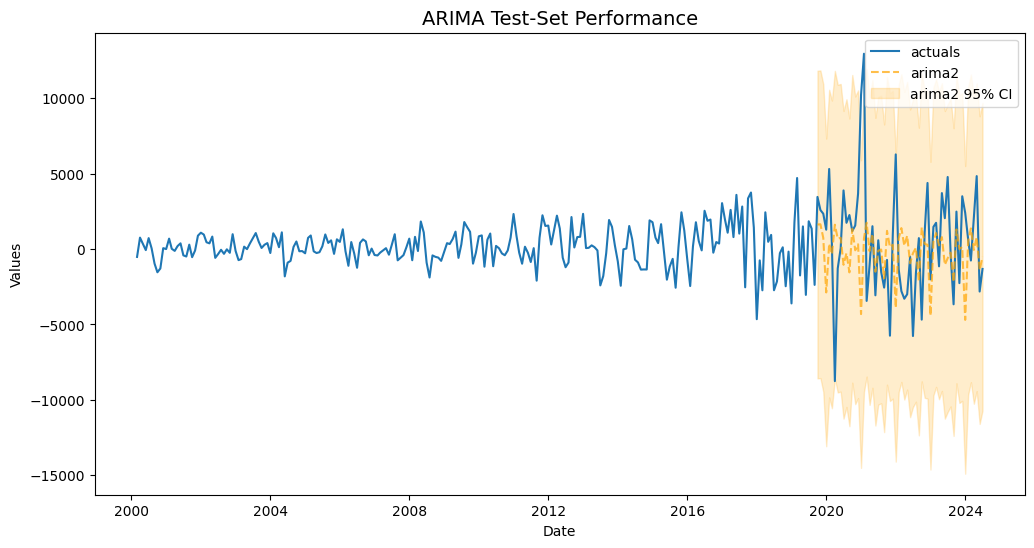

In [103]:
f.plot_test_set(ci=True,models='arima2')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()

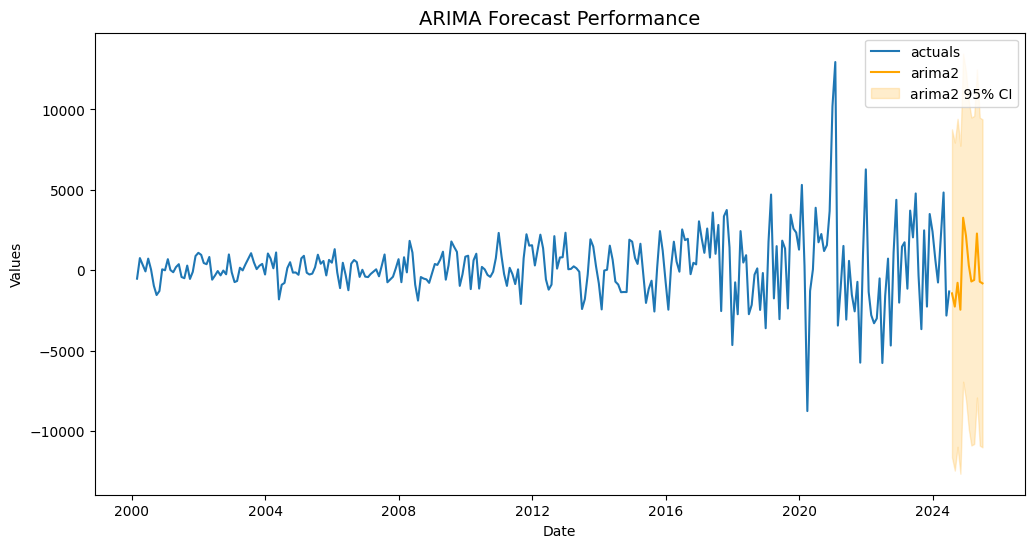

In [104]:
f.plot(ci=True,models='arima2')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [105]:
f.regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  293
Model:             ARIMA(2, 1, 2)x(2, 2, [1], 12)   Log Likelihood               -2474.437
Date:                            Sat, 22 Jun 2024   AIC                           4964.874
Time:                                    13:21:56   BIC                           4993.602
Sample:                                         0   HQIC                          4976.413
                                            - 293                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7316      0.052    -13.976      0.000      -0.834      -0.629
ar.L2          0.1715      0.047      3.651      0.000       0.079       0.263
ma.L1         -0.0080      1.293     -0.006      0.995      -2.541       2.525
ma.L2         -0.9920      1.295     -0.766      0.444      -3.530       1.545
ar.S.L12      -0.6159      0.053    -11.628      0.000      -0.720      -0.512
ar.S.L24      -0.2972      0.060     -4.982      0.000      -0.414      -0.180
ma.S.L12      -0.9970      1.295     -0.770      0.442      -3.536       1.542
sigma2      5.186e+06   4.86e-07   1.07e+13      0.000    5.19e+06    5.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               329.86
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              21.65   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.75e+30. Standard errors may be unstable.
"""

## **Arima 3**

In [109]:
from scalecast.auxmodels import auto_arima
f.set_validation_length(12)
grid = {
    'order':[
        (1,1,1),
        (1,1,0),
        (0,1,1),
    ],
    'seasonal_order':[
        (2,1,1,12),
        (1,1,1,12),
        (2,1,0,12),
        (0,1,0,12),
    ],
}

f.ingest_grid(grid)
f.tune()
f.auto_forecast(call_me='arima4')

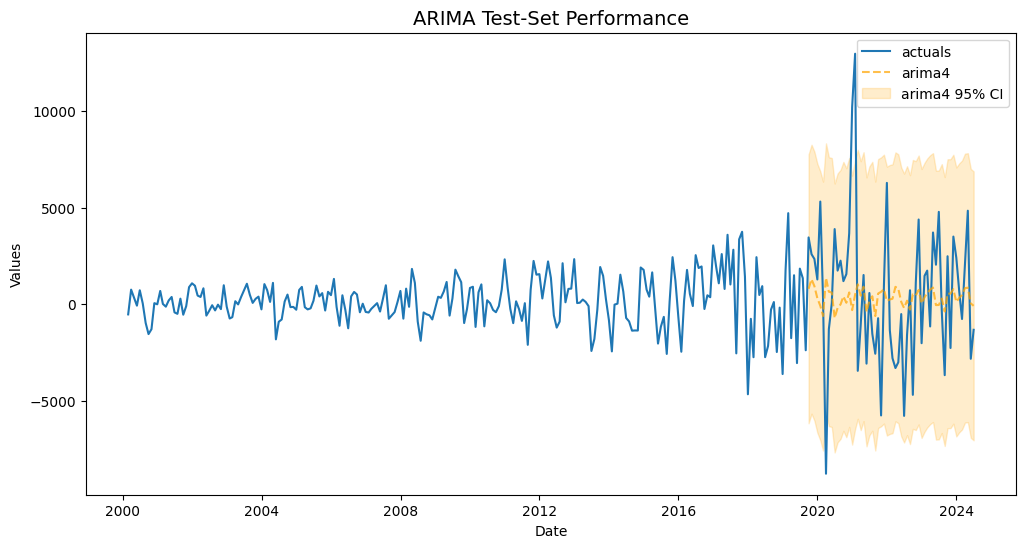

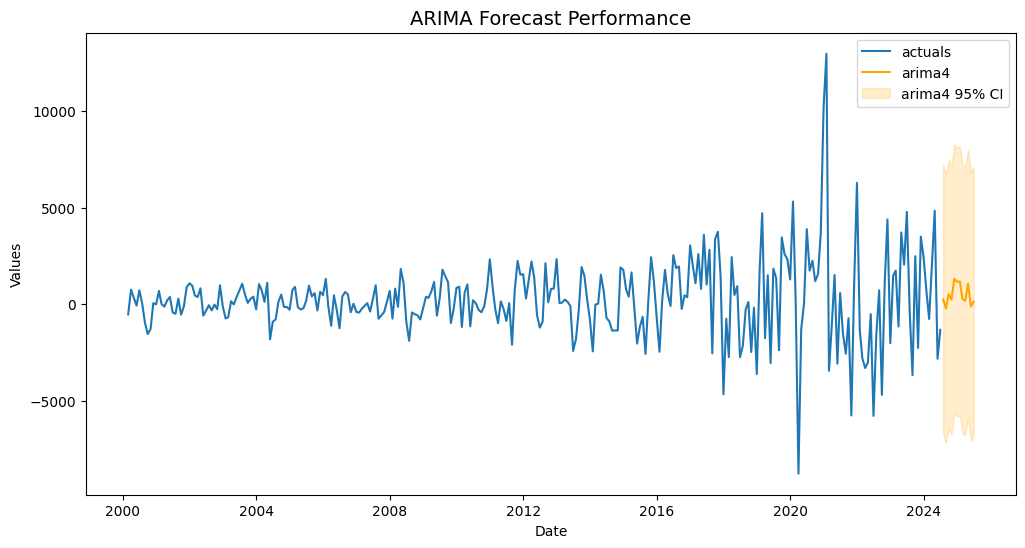

In [110]:
f.plot_test_set(ci=True,models='arima4')
plt.title('ARIMA Test-Set Performance',size=14)
plt.show()
f.plot(ci=True,models='arima4')
plt.title('ARIMA Forecast Performance',size=14)
plt.show()

In [ ]:
#df=df.set_index('Date')
#df=df.asfreq('D')
#df=df.sort_index()
#df,head()